# step 1 : import Packages 



In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd

# Step 2 : Import Dataset

In [2]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
dataset.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [5]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


# step 3:Find the Independed & Depended Features

In [22]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:3].values

In [23]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [11]:
X.ndim

2

In [24]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

# Linear Regression Model 

In [13]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# step 5: impliment the polynomial regression

In [15]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)


PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

In [16]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Visualising the Polynomial Regression results

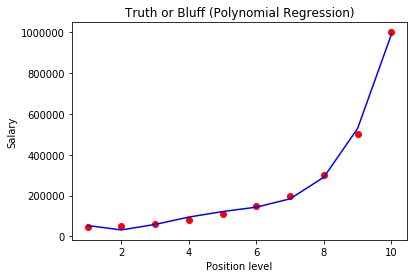

In [17]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualising the Linear  Regression results

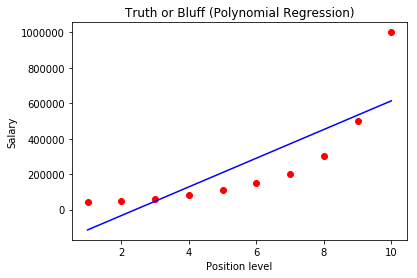

In [18]:
# Visualising the Linear Regression results
lr=LinearRegression()
yp=lr.fit(X,y).predict(X)
plt.scatter(X, y, color = 'red')
plt.plot(X, yp, color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

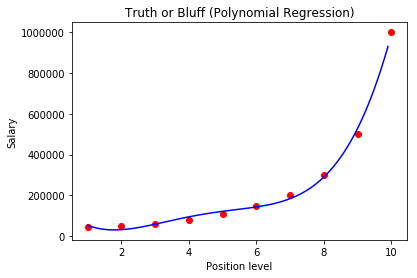

In [19]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [20]:
# Predicting a new result with Linear Regression
print(lin_reg.predict([[6.5]]))

# Predicting a new result with Polynomial Regression
print(lin_reg_2.predict(poly_reg.fit_transform([[6.5]])))

[330378.78787879]
[158862.45265153]


In [25]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred =lin_reg_2.predict(poly_reg.fit_transform(y))
mse = mean_squared_error(y, y_pred)
mse

7.954914011365184e+52

In [26]:
r_squared = r2_score(y, y_pred)
r_squared

-9.862003615526699e+41